In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import seaborn as sns

**First step **: **Asking questions**:
1. Movies with largest and lowest budgets
2. Average runtime of movie
3. Are short movies more popular?
4. Top Movies based on their revenue
5. Which movies are popular year by year?







```
# This is formatted as code
```

**Second step:Data wrangling**

In [56]:
df_movies=pd.read_csv("/content/tmdb_5000_movies.csv")

In [43]:
df_credits=pd.read_csv("/content/tmdb_5000_credits.csv")

In [74]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df_movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [57]:
df_movies=df_movies.drop(['homepage', 'tagline', 'keywords', 'overview', 'id'], axis=1)

replace 0 with NAN

In [58]:
df_movies['revenue'].replace(0, np.NAN, inplace=True)
df_movies['budget'].replace(0, np.NAN, inplace=True)
df_movies['runtime'].replace(0, np.NAN, inplace=True)
df_movies.dropna(axis=0, inplace=True)

 Changing the release date column into date format

In [59]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [60]:
df_movies.dtypes

budget                         float64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [61]:
df_movies['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [62]:
df_movies['release_date'].tail()

4773   1994-09-13
4788   1972-03-12
4792   1997-11-06
4796   2004-10-08
4798   1992-09-04
Name: release_date, dtype: datetime64[ns]

replace 0 values with means in columns budget and revenue.

In [63]:

df_movies['budget'] = df_movies['budget'].replace(0,df_movies['budget'].mean())

df_movies['revenue'] = df_movies['revenue'].replace(0,df_movies['revenue'].mean())

**Exploratory Data Analysis**

**first question:**
*   Movies with largest and lowest budgets




In [64]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df_movies.insert(2,'profit',df_movies['revenue']-df_movies['budget'])

#previewing the changes in the dataset
df_movies.head(2)

,budget,genres,profit,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.550965e+09,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.610000e+08,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500


In [65]:
import pprint


In [66]:
#defining the function
def calculate(column):
    #for highest earned profit
    high=df_movies[column].idxmax()
    high_details=pd.DataFrame(df_movies.loc[high])
    
    #for lowest earned profit
    low= df_movies[column].idxmin()
    low_details=pd.DataFrame(df_movies.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit')

,0,13
budget,2.37e+08,2.55e+08
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
profit,2.55097e+09,-1.6571e+08
original_language,en,en
original_title,Avatar,The Lone Ranger
popularity,150.438,49.047
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
revenue,2.78797e+09,8.92899e+07


In [67]:
calculate('budget')

,17,4238
budget,3.8e+08,1
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name..."
profit,6.65714e+08,8.5e+06
original_language,en,en
original_title,Pirates of the Caribbean: On Stranger Tides,Modern Times
popularity,135.414,28.2765
production_companies,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""United Artists"", ""id"": 60}, {""name""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1.04571e+09,8.5e+06


**Second question**
*   Average runtime of movie






In [69]:
def avg_fun(column):
    return df_movies[column].mean()

In [70]:
avg_fun('runtime')

110.72437287085785

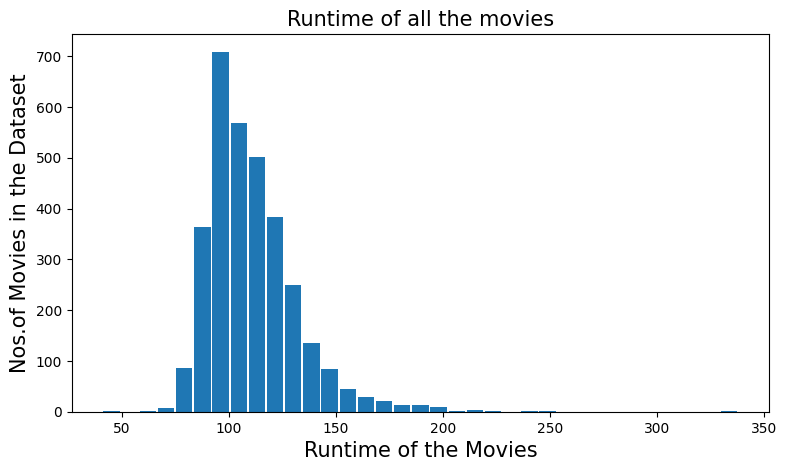

In [71]:

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df_movies['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

**Third question**
*   Are short movies more popular?



In [72]:
shorter_movies = df_movies.sort_values(by=['runtime'], ascending = False).head(200)
runtime = shorter_movies['runtime']
popularity = shorter_movies['popularity']

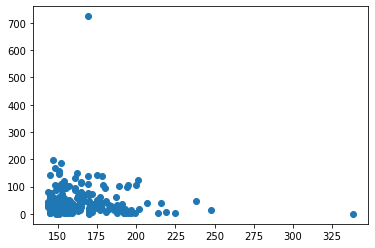

In [73]:
plt.scatter(runtime, popularity)
plt.show()

In [89]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   float64       
 1   genres                3229 non-null   object        
 2   profit                3229 non-null   float64       
 3   original_language     3229 non-null   object        
 4   original_title        3229 non-null   object        
 5   popularity            3229 non-null   float64       
 6   production_companies  3229 non-null   object        
 7   production_countries  3229 non-null   object        
 8   release_date          3229 non-null   datetime64[ns]
 9   revenue               3229 non-null   float64       
 10  runtime               3229 non-null   float64       
 11  spoken_languages      3229 non-null   object        
 12  status                3229 non-null   object        
 13  title             

**Fourth question**


*   Top Movies based on their revenue



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


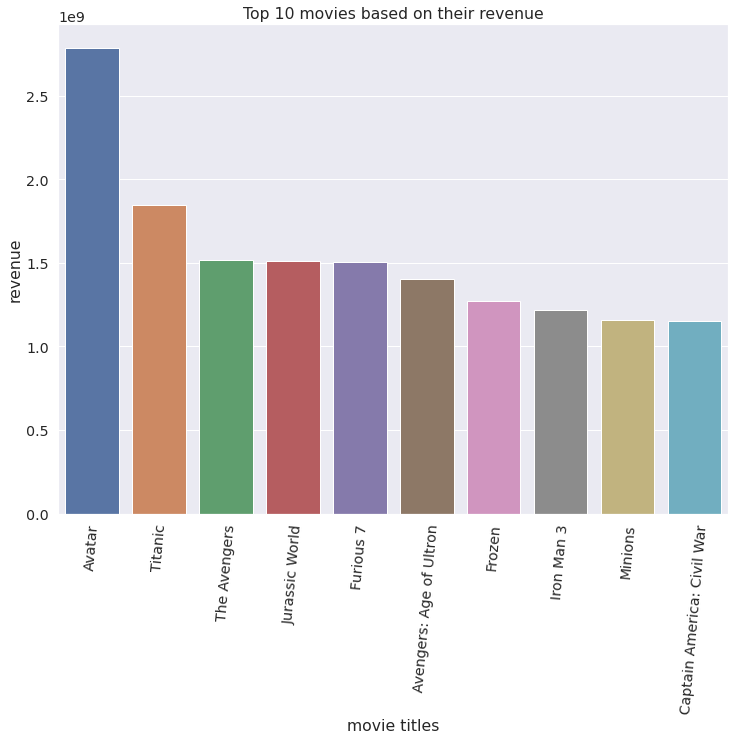

In [95]:
revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = df_movies[["title", "revenue"]]
movies_and_budget = df_movies[['title','budget']]
movies_and_popularity = df_movies[['title','popularity']]
movies_and_votes= df_movies[['title','vote_average']]


#print(movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10))
#print("\n")
#print(movies_and_budget.sort_values(by = "budget_adj", ascending = False).head(10))

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue", ascending=False).head(10).title,
    movies_and_revenue.sort_values(by = "revenue", ascending=False).head(10).revenue)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='revenue', title = 'Top 10 movies based on their revenue')
plt.show()

**Fifth question**

*   Which movies are popular year by year?




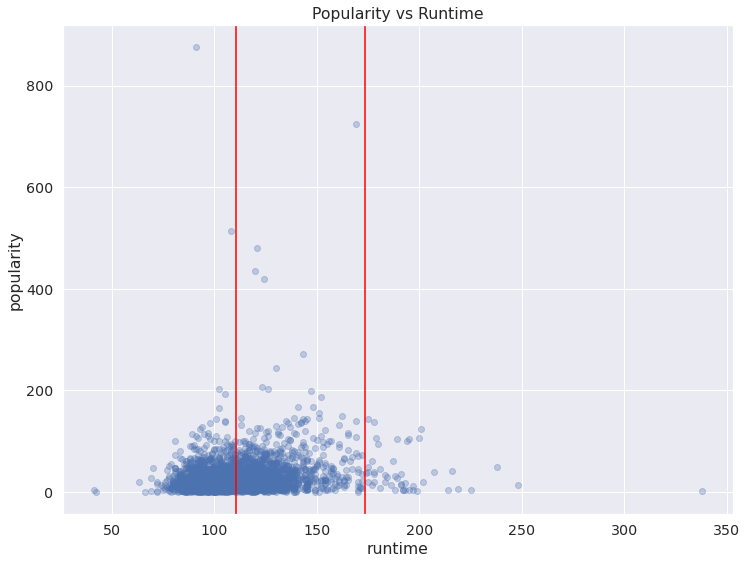

In [94]:
plt.scatter(x = df_movies['runtime'],y = df_movies['popularity'], alpha = 0.3)
plt.axvline(x = df_movies['runtime'].mean(), color = "red");
plt.axvline(x = np.mean(df_movies['runtime']) + 3*np.std(df_movies['runtime']), color = 'red')
plt.xlabel("runtime");
plt.ylabel("popularity");
plt.title('Popularity vs Runtime');

**Conclusion**


*   The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

*   we can see that the more popular movies is the shortest movies.

*   the top movie from the given dataset based on their revenue was **Avatar**
*   All the popular movies have runtime more than 102 minute.




